In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_inputs, train_labels), (test_inputs, test_labels) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_inputs.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


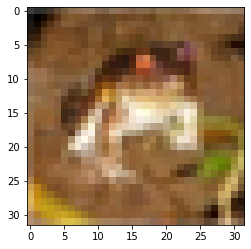

In [4]:
plt.imshow(train_inputs[0])
plt.show()

In [5]:
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

In [6]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'), # 128개의 노드로
                          keras.layers.Dense(10,activation='softmax'), # 10개의 노드로
                          ])

In [7]:
model.summary() # 모델 생성

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_flatten = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
test_output1 = model_flatten(tf.expand_dims(train_inputs[0],axis=0))
print(test_output1)

tf.Tensor([[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]], shape=(1, 3072), dtype=float32)


In [9]:
model_dense1 = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
test_output2 = model_dense1(tf.expand_dims(train_inputs[0],axis=0))
print(test_output2)

tf.Tensor(
[[0.         0.573325   0.1382064  0.97816825 0.6487957  0.79666555
  0.37408477 0.         0.39611307 0.         0.         0.4855346
  0.         0.         0.         0.56171864 0.         1.693476
  0.48519036 0.         0.16630268 0.         0.24851197 0.
  0.         0.4875059  0.00487781 0.5669669  0.35476756 0.81353533
  0.         0.         0.         0.4382488  0.         0.
  0.         0.         0.0429295  0.         0.         0.
  0.57544863 0.31186473 0.         0.29974824 0.         0.36037034
  0.         0.         0.         0.         0.5368997  0.1607547
  0.65558934 0.         0.08624989 0.         0.         0.
  0.         0.49909568 0.         0.         0.         0.4577199
  1.1726401  0.08093214 0.2243222  0.         0.02530523 0.28894514
  0.         0.         0.6509993  0.2061895  0.18647347 0.
  0.         0.42095256 0.0444164  0.         0.58651316 0.
  0.3233993  0.42226094 0.22637793 0.         0.         0.
  0.         0.         0.    

In [10]:
model_dense2 = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
test_output3 = model_dense2(tf.expand_dims(train_inputs[0],axis=0))
print(test_output3)

tf.Tensor(
[[0.07970815 0.17447697 0.10763831 0.09127273 0.13720097 0.04772007
  0.06577889 0.09688351 0.15034632 0.04897407]], shape=(1, 10), dtype=float32)


In [11]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [12]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 20s 3ms/step - loss: 1.9502 - acc: 0.2751 - val_loss: 1.8783 - val_acc: 0.3172
Epoch 2/20
6250/6250 [==============================] - 19s 3ms/step - loss: 1.8735 - acc: 0.3090 - val_loss: 1.8658 - val_acc: 0.3153
Epoch 3/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8566 - acc: 0.3171 - val_loss: 1.8418 - val_acc: 0.3199
Epoch 4/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8451 - acc: 0.3235 - val_loss: 1.8316 - val_acc: 0.3302
Epoch 5/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8348 - acc: 0.3278 - val_loss: 1.8834 - val_acc: 0.3068
Epoch 6/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8308 - acc: 0.3322 - val_loss: 1.8430 - val_acc: 0.3220
Epoch 7/20
6250/6250 [==============================] - 20s 3ms/step - loss: 1.8248 - acc: 0.3312 - val_loss: 1.8213 - val_acc: 0.3230
Epoch 8/20
6250/6250 [==============================] - 20s 3ms/st

In [21]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          
                          # 입력 이미지가 32*32*3이고  결과 이미지가 28*28*3
                          # stride의 크기를 1로 줬으므로 kernel의 크기는 5*5*3, 차원은 12
                          keras.layers.Conv2D(12, (5, 5), strides = (1, 1), padding = 'valid'),

                          # MaxPooling
                          keras.layers.MaxPool2D(),

                          # 입력 이미지가 14*14*3이고  결과 이미지가 10*10*3
                          # stride의 크기를 1로 줬으므로 kernel의 크기는 5*5*3, 차원은 8
                          keras.layers.Conv2D(8, (5, 5), strides = (1, 1), padding = 'valid'),

                          # flatten
                          keras.layers.Flatten(),

                           # 10개의 노드로 dense
                          keras.layers.Dense(10,activation='softmax'),
])

In [22]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [23]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6250/6250 [==============================] - 53s 4ms/step - loss: 1.6638 - acc: 0.4165 - val_loss: 1.4672 - val_acc: 0.4864
Epoch 2/20
6250/6250 [==============================] - 26s 4ms/step - loss: 1.4527 - acc: 0.5015 - val_loss: 1.5593 - val_acc: 0.4685
Epoch 3/20
6250/6250 [==============================] - 26s 4ms/step - loss: 1.3881 - acc: 0.5225 - val_loss: 1.3413 - val_acc: 0.5346
Epoch 4/20
6250/6250 [==============================] - 26s 4ms/step - loss: 1.3540 - acc: 0.5360 - val_loss: 1.3486 - val_acc: 0.5340
Epoch 5/20
6250/6250 [==============================] - 26s 4ms/step - loss: 1.3282 - acc: 0.5450 - val_loss: 1.3412 - val_acc: 0.5424
Epoch 6/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.3119 - acc: 0.5491 - val_loss: 1.3227 - val_acc: 0.5439
Epoch 7/20
6250/6250 [==============================] - 27s 4ms/step - loss: 1.3011 - acc: 0.5531 - val_loss: 1.3845 - val_acc: 0.5314
Epoch 8/20
6250/6250 [==============================] - 27s 4ms/st